# What is PyCaret?

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.



In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━

use_gpu= True to use gpu functionality <br/>
log_experiment= True for logging metrics, parameters, and artifacts

### Preprocessing in PyCaret
- Sample and Split: Train test split, Sampling
- Data Preparation: impute missing values, one-hot encodding, ordinal encoding, cardinal encoding, fix imbalance
- Scale and Transform: Normaliztion, Transformation
- Feature Engineering: Feature interaction, Polynomial Features, Group features, Bin numeric features
- Feature Selection: Feature importance, remove multicollinearity, PCA, ignore low variance
Unsupervised: Create clusters, remove outliers

### Modules in PyCaret
- pycaret.classification - Supervised: Binary or multi-class classification
- pycaret.regression - Supervised: Regression
- pycaret.clustering - Unsupervised: Clustering
- pycaret.anomaly - Unsupervised: Anomaly Detection
- pycaret.nlp - Unsupervised: Natural Language Processing (Topic Modeling)
- pycaret.arules - 	Unsupervised: Association Rules Mining
- pycaret.datasets - Datasets

### Steps of a ML Workflow
1) Business Problem <br/>
2) Data sourcing and ETL <br/>
3) Exploratory Data Analysis(EDA) <br/>
4) Data Prep <br/>
5) Model Training and Selection <br/>
6) Deployment and Monitoring <br/>

# Example Project
### Problem Statement
Predict the price of diamond given the attributes like cut, colour, shape, etc

In [2]:
## Import the data
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
## Exploratory data analysis(EDA)
# plot scatter carat_weight and Price
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y=data['Price'], facet_col = data['Cut'], opacity = 0.25, trendline = 'ols', trendline_color_override = 'red')
fig.show()

In [4]:
# histogram of target variable price
fig = px.histogram(data, x=['Price'])
fig.show()


In [5]:
# perform log transformtion on right-skewed Price values
import numpy as np
data['logged_Price'] = np.log(data['Price'])
fig = px.histogram(data, x=['logged_Price'])
fig.show()

In [ ]:
!pip install numpy==1.20

In [8]:
## Data cleaning and preparation
# initialize setup
import numpy as np
from pycaret.regression import *
s = setup(data, target = 'Price', transform_target = True, log_experiment= True, experiment_name= 'diamond' )

,Description,Value
0,session_id,2355
1,Target,Price
2,Original Data,"(6000, 9)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 29)"


INFO:logs:Logging experiment in MLFlow
2023/01/31 08:03:02 INFO mlflow.tracking.fluent: Experiment with name 'diamond' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scalin

In [9]:
## ML model training and selection
# compare all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,75.4170,6.570046e+04,224.2905,0.9993,0.0068,0.0048,0.403
dt,Decision Tree Regressor,29.6569,7.891681e+04,232.8341,0.9992,0.0043,0.0012,0.040
et,Extra Trees Regressor,32.6575,9.275791e+04,224.6172,0.9991,0.0049,0.0016,1.530
rf,Random Forest Regressor,19.7482,1.064695e+05,203.4010,0.9990,0.0030,0.0007,1.336
lightgbm,Light Gradient Boosting Machine,104.6715,7.306441e+05,751.7961,0.9931,0.0123,0.0043,0.165
ada,AdaBoost Regressor,557.5410,2.424188e+06,1431.2124,0.9771,0.0508,0.0379,0.198
knn,K Neighbors Regressor,1718.5057,1.073788e+07,3258.4589,0.8954,0.2115,0.1431,0.368
lr,Linear Regression,1791.4229,8.722887e+07,8976.0960,0.1579,0.1141,0.0728,0.482
br,Bayesian Ridge,1793.2266,8.775069e+07,9000.8955,0.1531,0.1141,0.0728,0.028
ridge,Ridge Regression,1801.4819,9.267160e+07,9160.5147,0.1134,0.1139,0.0730,0.041


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                           

Only the best model is returned by default, but this can be changed with the n_select parameter. For example, passing n_select = 3 in the compare_models function will return top 3 models as a list.

In [10]:
# check the final params of best model
best.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 2355,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False,
 'power_transformer_method': 'box-cox',
 'power_transformer_standardize': True,
 'regressor': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
         

In [11]:
# check the residuals of trained model
plot_model(best, plot = 'residuals_interactive')

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


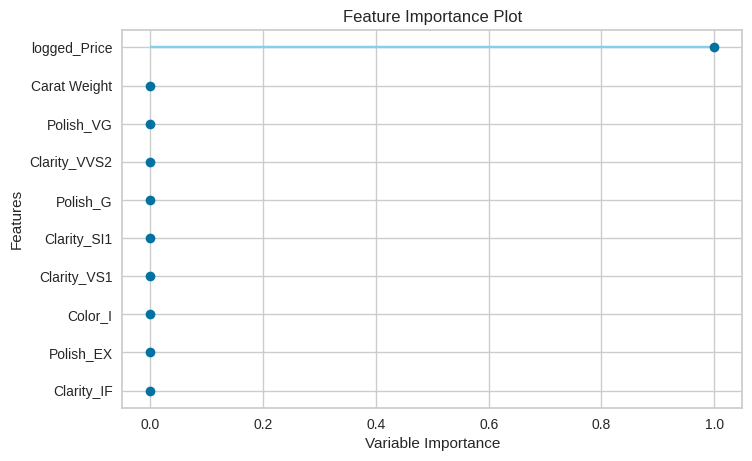

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [12]:
plot_model(best, plot = 'feature')

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_impurity_sp

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

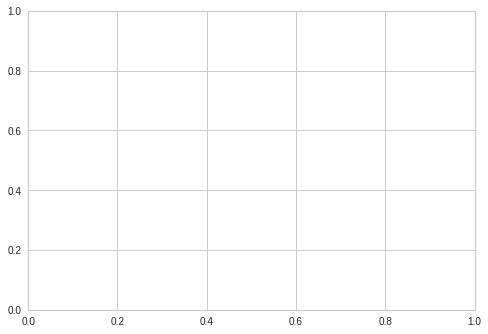

In [13]:
evaluate_model(best)

In [16]:
## Deployment and monitoring of ML model
# copy data and remove target variable
data_unseen = data.copy()
data_unseen = data_unseen.drop('Price', axis =1)
predictions = predict_model(best, data= data_unseen)
predictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_impurity_spli

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,logged_Price,Label
0,1.10,Ideal,H,SI1,VG,EX,GIA,8.550435,5171.839931
1,0.83,Ideal,H,VS1,ID,ID,AGSL,8.151910,3460.125751
2,0.85,Ideal,H,SI1,EX,EX,GIA,8.065579,3170.119914
3,0.91,Ideal,E,SI1,VG,VG,GIA,8.382518,4380.008475
4,0.83,Ideal,G,SI1,EX,EX,GIA,8.061802,3165.889443
...,...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,8.740337,6242.910147
5996,1.00,Very Good,D,SI1,VG,VG,GIA,8.580731,5325.746450
5997,1.02,Ideal,D,SI1,EX,EX,GIA,8.725345,6167.452769
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,9.324205,11294.062991


In [17]:
# For future use, you can save the entire pipeline with the save_model function
save_model(best, 'my_best_pipeline')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_impurity_split=None,
  

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                                                                      min

In [ ]:
!pip install mlflow
## Experiment logging
# within notebook
!mlflow ui
# from the command line
# mlflow ui

mlfow not working?